In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder


In [4]:
book = pd.read_csv('book.csv')
book.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [5]:
book.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


## Apriori Algorithm

In [6]:
freq_itemsets = apriori(book, min_support = 0.2, use_colnames = True)
freq_itemsets

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.2560,"(CookBks, ChildBks)"


In [7]:
book.mean()

ChildBks     0.4230
YouthBks     0.2475
CookBks      0.4310
DoItYBks     0.2820
RefBks       0.2145
ArtBks       0.2410
GeogBks      0.2760
ItalCook     0.1135
ItalAtlas    0.0370
ItalArt      0.0485
Florence     0.1085
dtype: float64

In [8]:
freq_itemsets1 = apriori(book, min_support = 0.03, use_colnames = True) 
## here we have covered all combinations by taking min support value
freq_itemsets1

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
176,0.0535,"(ArtBks, DoItYBks, CookBks, ChildBks, GeogBks)"
177,0.0405,"(ArtBks, RefBks, CookBks, ChildBks, GeogBks)"
178,0.0300,"(ArtBks, ItalCook, CookBks, ChildBks, GeogBks)"
179,0.0370,"(ArtBks, DoItYBks, CookBks, YouthBks, GeogBks)"


In [20]:
rules = association_rules(freq_itemsets1, metric = 'confidence', min_threshold = 0.9)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.0,2.320186,0.064582,inf
1,(ItalAtlas),(RefBks),0.0370,0.2145,0.0370,1.0,4.662005,0.029063,inf
2,(ItalArt),(ArtBks),0.0485,0.2410,0.0485,1.0,4.149378,0.036812,inf
3,"(ItalCook, ChildBks)",(CookBks),0.0850,0.4310,0.0850,1.0,2.320186,0.048365,inf
4,"(ItalArt, ChildBks)",(ArtBks),0.0360,0.2410,0.0360,1.0,4.149378,0.027324,inf


In [21]:
rules.sort_values('lift', ascending = False)   ## these are the books associated with each other with 90% confidence level

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
33,"(CookBks, ItalArt)","(ItalCook, ArtBks)",0.0410,0.0565,0.0375,0.914634,16.188215,0.035183,11.052429
31,"(CookBks, ItalArt, ArtBks)",(ItalCook),0.0410,0.1135,0.0375,0.914634,8.058451,0.032847,10.384714
12,"(CookBks, ItalArt)",(ItalCook),0.0410,0.1135,0.0375,0.914634,8.058451,0.032847,10.384714
32,"(ItalCook, ItalArt)","(CookBks, ArtBks)",0.0375,0.1670,0.0375,1.000000,5.988024,0.031237,inf
1,(ItalAtlas),(RefBks),0.0370,0.2145,0.0370,1.000000,4.662005,0.029063,inf
14,"(ItalCook, ItalArt)",(ArtBks),0.0375,0.2410,0.0375,1.000000,4.149378,0.028463,inf
13,"(ItalArt, DoItYBks)",(ArtBks),0.0300,0.2410,0.0300,1.000000,4.149378,0.022770,inf
9,"(CookBks, ItalArt)",(ArtBks),0.0410,0.2410,0.0410,1.000000,4.149378,0.031119,inf
21,"(CookBks, ItalArt, ChildBks)",(ArtBks),0.0300,0.2410,0.0300,1.000000,4.149378,0.022770,inf
4,"(ItalArt, ChildBks)",(ArtBks),0.0360,0.2410,0.0360,1.000000,4.149378,0.027324,inf


In [32]:
rules = rules[rules.lift>1].sort_values('lift')
rules.tail()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(ItalAtlas),(RefBks),0.0370,0.2145,0.0370,1.000000,4.662005,0.029063,inf
32,"(ItalCook, ItalArt)","(CookBks, ArtBks)",0.0375,0.1670,0.0375,1.000000,5.988024,0.031237,inf
12,"(CookBks, ItalArt)",(ItalCook),0.0410,0.1135,0.0375,0.914634,8.058451,0.032847,10.384714
31,"(CookBks, ItalArt, ArtBks)",(ItalCook),0.0410,0.1135,0.0375,0.914634,8.058451,0.032847,10.384714
33,"(CookBks, ItalArt)","(ItalCook, ArtBks)",0.0410,0.0565,0.0375,0.914634,16.188215,0.035183,11.052429


#### Inferences drawn

Most of people who read (CookBks, ItalArt) also read ItalCook books.

(array([120.,  10.,   3.,   0.,   2.,   0.,   0.,   0.,   0.,   1.]),
 array([ 1.85614849,  3.28935514,  4.72256179,  6.15576844,  7.58897509,
         9.02218174, 10.45538838, 11.88859503, 13.32180168, 14.75500833,
        16.18821498]),
 <BarContainer object of 10 artists>)

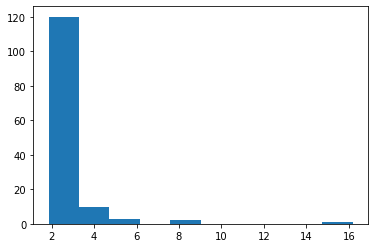

In [19]:
plt.hist(rules.lift)

(array([38., 32., 21.,  8.,  7., 15.,  5.,  6.,  1.,  3.]),
 array([0.03   , 0.03925, 0.0485 , 0.05775, 0.067  , 0.07625, 0.0855 ,
        0.09475, 0.104  , 0.11325, 0.1225 ]),
 <BarContainer object of 10 artists>)

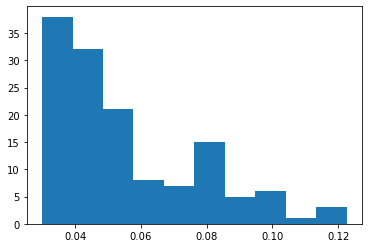

In [20]:
plt.hist(rules.support)

(array([23., 25., 19., 16., 10.,  9.,  3.,  0.,  0., 31.]),
 array([0.8 , 0.82, 0.84, 0.86, 0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <BarContainer object of 10 artists>)

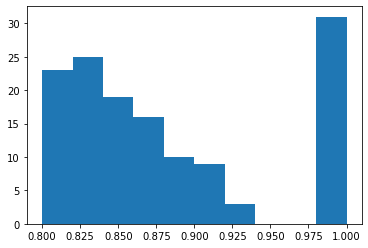

In [21]:
plt.hist(rules.confidence)

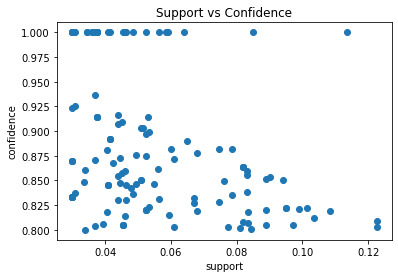

In [22]:
plt.scatter(rules['support'], rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

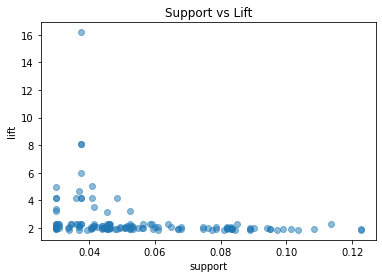

In [23]:
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()